In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import *
import matplotlib.patches as mp
from matplotlib import gridspec
import fractions

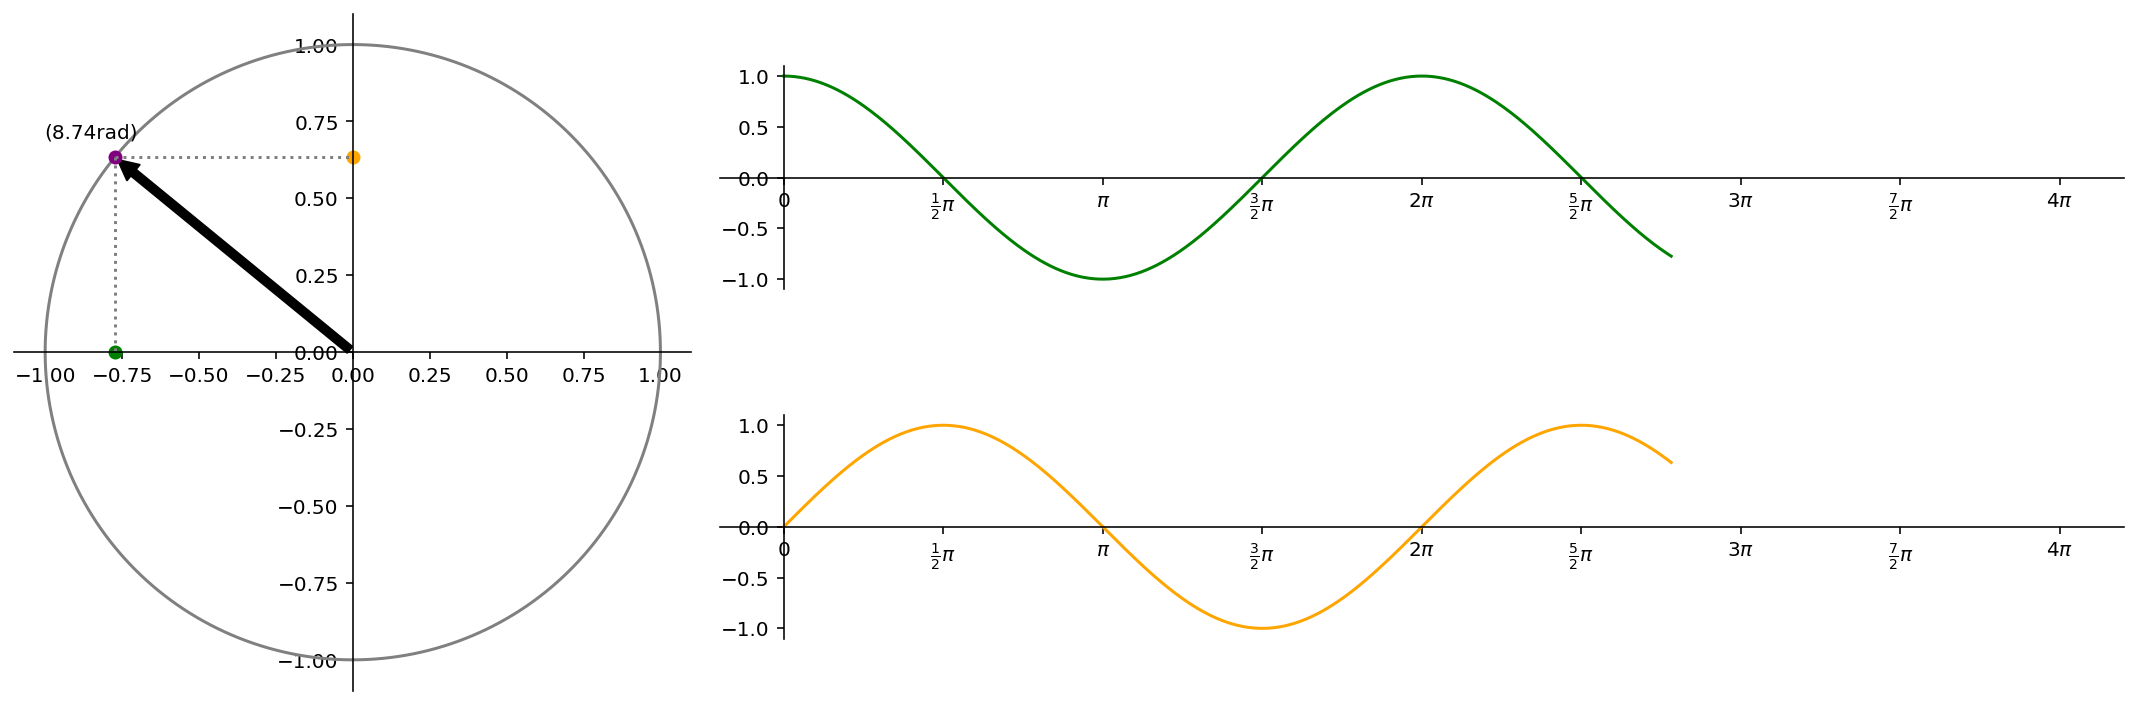

In [3]:
N=2
t=np.linspace(0,N*2*np.pi,720)

fig=plt.figure(figsize=(15,5))

axC=plt.subplot2grid((2,6),(0,0),colspan=2,rowspan=2)
axG=plt.subplot2grid((2,6),(0,2),colspan=4,rowspan=1)
axG2=plt.subplot2grid((2,6),(1,2),colspan=4,rowspan=1)

#axC=fig.add_subplot(121)
#axG=fig.add_subplot(122)



colPt ='purple'
colCos='green'
colSin='orange'

tC=np.linspace(0,2*np.pi,500)

axC.plot(np.cos(tC),np.sin(tC),'gray')
axC.axis("scaled")


dot= axC.plot([1],[0],'o',color=colPt)
dotC= axC.plot([1],[0],'o',color=colCos)
dotS= axC.plot([0],[0],'o',color=colSin)
lineC=axC.plot([1,1],[0,0],linestyle='dotted',color='gray')
lineS=axC.plot([1,0],[0,0],linestyle='dotted',color='gray')


arrow=mp.FancyArrowPatch((0,0),(1,0),mutation_scale=20)
axC.add_patch(arrow)
texte=axC.text(1,0,"$(0rad)$",horizontalalignment="center")

graphC=axG.plot([],[],color = colCos)
graphS=axG2.plot([],[],color= colSin)
for ax in [axG,axG2,axC] :
    if ax in [axG,axG2] :
        ax.set_xlim(0,N*2*np.pi)
        ax.set_ylim(-1,1)
        ax.set_xticks([np.pi/2*k for k in range(N*4+1)])
    
        labels = []
        for k in range(N*4+1) :
            f=fractions.Fraction(k,2)
            n=f.numerator
            d=f.denominator
            if k%2==0 :
              txtlabel=str(n)
            else:
                txtlabel='\\frac{'+str(n)+'}{'+str(d)+'}'
        
            if k==0:
                labels+=['$'+txtlabel+'$']
            elif k==2:
                labels+=['$\\pi$']
            else :
                labels+=['$'+txtlabel+'\\pi$']
        ax.set_xticklabels(labels)
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position('zero')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position('zero')    
    
    
    
axG.axis("scaled")
axG2.axis("scaled")


def animate(i) :
    global arrow
    
    tt=np.linspace(0,t[i],500)
    ct=np.cos(tt)
    st=np.sin(tt)
    
    graphC[0].set_data(tt,ct)
    graphS[0].set_data(tt,st)
    
    lineC[0].set_data([ np.cos(t[i]),np.cos(t[i]) ], [ np.sin(t[i]),0])
    lineS[0].set_data([ np.cos(t[i]),0 ], [ np.sin(t[i]),np.sin(t[i])])
    
    dot[0].set_data([ np.cos(t[i]) ], [ np.sin(t[i])])

    dotS[0].set_data([ 0 ], [ np.sin(t[i])])
    dotC[0].set_data([ np.cos(t[i]) ], [0])
    
    texte.set_position((1.1*np.cos(t[i]), 1.1* np.sin(t[i])))
    texte.set_text("("+str(round(t[i],2))+"rad)")
    arrow.remove()
    arrow=mp.FancyArrowPatch((0,0),( np.cos(t[i]), np.sin(t[i])),mutation_scale=20,color='k')
    axC.add_patch(arrow)
    return arrow,dot,dotC,dotS,lineC,lineS

i=500 
animate(i)

plt.tight_layout()
plt.show()


fig.savefig("figure.pdf")


In [12]:
import fractions